In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)


import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')


import pylab as plt
import seaborn as sns

%matplotlib inline

In [2]:
sharks_ori = pd.read_csv('../Data/attacks.csv', encoding='latin1')
sharks = sharks_ori.copy()  #realizamos una copia para no perder el original
sharks_ori.shape #para no perder de vista la dimensión original que debe mantener

(25723, 24)

In [3]:
sharks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [4]:
sharks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
nan_cols = sharks.isna().sum()

nan_cols[nan_cols>0]

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [6]:
def check_nan(df: pd.DataFrame) -> None:
    
    nan_cols = df.isna().mean() * 100  
    
    nan_cols = nan_cols[nan_cols>0]
    
    display(f'N nan cols: {len(nan_cols)}')
    display(nan_cols)
    
    
    plt.figure(figsize=(10, 6))  

    sns.heatmap(df.isna(),       
                yticklabels=False,  
                cmap='viridis',     
                cbar=False           
               )

    plt.show();

'N nan cols: 24'

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

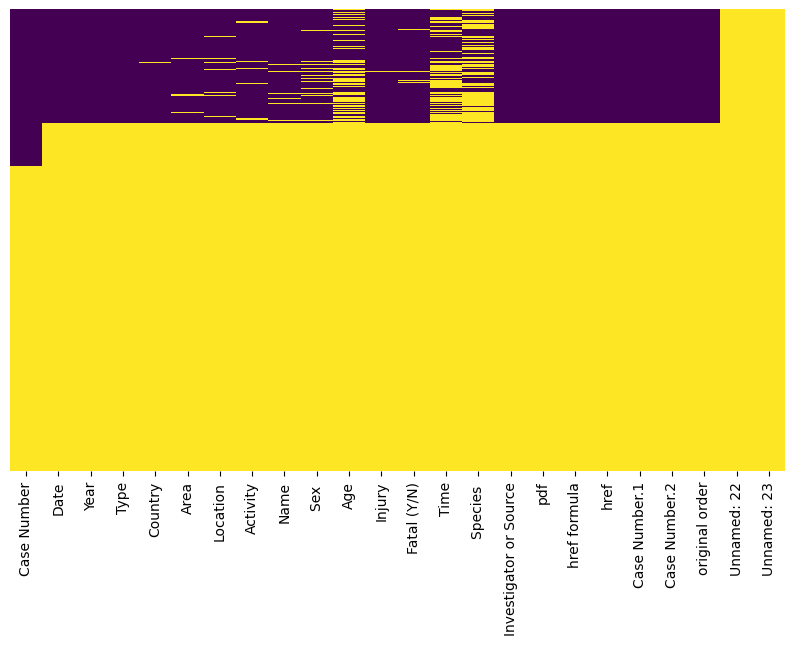

In [7]:
check_nan(sharks)

In [8]:
filas_solonulos = sharks.isna().all(axis=1)  # aquí observamos las filas en las que todos sus datos son nulos
filas_solonulos

0        False
1        False
2        False
3        False
4        False
         ...  
25718     True
25719     True
25720     True
25721     True
25722    False
Length: 25723, dtype: bool

In [9]:
# ahora vamos a eliminar las filas en las que todos sus datos son nulos

sharks.dropna(how = 'all', inplace = True)

print(sharks_ori.shape)

print(sharks.shape)   # hemos eliminado 17020 filas que solo contenían valores nulos

(25723, 24)
(8703, 24)


'N nan cols: 24'

Case Number                0.011490
Date                      27.588188
Year                      27.611169
Type                      27.634149
Country                   28.162703
Area                      32.816270
Location                  33.792945
Activity                  33.838906
Name                      30.001149
Sex                       34.080202
Age                       60.117201
Injury                    27.909916
Fatal (Y/N)               33.781455
Time                      66.126623
Species                   60.197633
Investigator or Source    27.783523
pdf                       27.588188
href formula              27.599678
href                      27.588188
Case Number.1             27.588188
Case Number.2             27.588188
original order            27.507756
Unnamed: 22               99.988510
Unnamed: 23               99.977019
dtype: float64

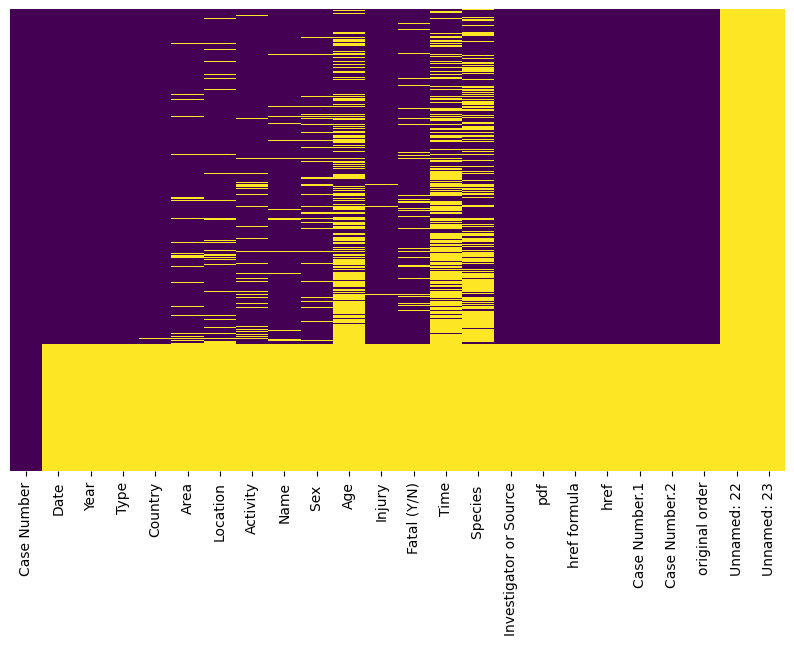

In [10]:
check_nan(sharks)    # vemos cómo ha cambiado la gráfica, aunque siguen apareciendo muchos valores nulos

In [11]:
sharks.duplicated().any()    # comprobamos si hay duplicados

True

In [12]:
sharks.drop_duplicates(inplace=True)   # eliminamos los duplicados


In [13]:
sharks.duplicated().any()     #comprobamos de nuevo

False

In [14]:
sharks.shape    # se ha reducido de nuevo el nº de filas

(6311, 24)

'N nan cols: 24'

Case Number                0.015845
Date                       0.142608
Year                       0.174299
Type                       0.205990
Country                    0.934876
Area                       7.352242
Location                   8.699097
Activity                   8.762478
Name                       3.470132
Sex                        9.095231
Age                       45.000792
Injury                     0.586278
Fatal (Y/N)                8.683251
Time                      53.287910
Species                   45.111710
Investigator or Source     0.411979
pdf                        0.142608
href formula               0.158453
href                       0.142608
Case Number.1              0.142608
Case Number.2              0.142608
original order             0.031691
Unnamed: 22               99.984155
Unnamed: 23               99.968309
dtype: float64

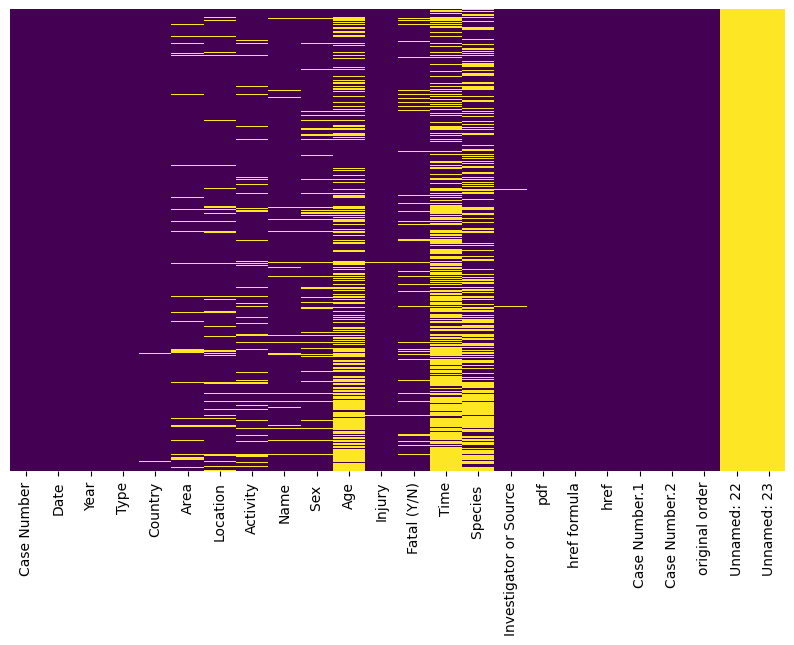

In [15]:
check_nan(sharks) 

In [16]:
# ahora vamos a eliminar las columnas en las que la mayoría de sus datos son nulos: 'Unnamed: 22' y 'Unnamed: 23'


borrar_cols = ['Unnamed: 22', 'Unnamed: 23']
sharks.drop(columns = borrar_cols, inplace=True)


In [17]:
# se observa que hay muchas filas con numerosos valores nulos
# vamos a calcular el porcentaje de nulos por filas y establecer el umbral en 75%


porc_filas_nulas = sharks.isna().mean(axis=1) * 100

umbral = 75

eliminar = sharks[porc_filas_nulas > umbral]
eliminar = eliminar.index
eliminar

Int64Index([6302, 6303, 6304, 6305, 6306, 6307, 6308, 6309, 25722], dtype='int64')

In [18]:
# tras comprobar las filas en las que más del 75% son valores nulos, decidimos eliminarlas

sharks.drop(index = eliminar, inplace = True)

In [19]:
sharks.shape # llegado este momento, hemos pasado de (6311, 24) a (6302, 22)

(6302, 22)

'N nan cols: 16'

Case Number                0.015868
Year                       0.031736
Type                       0.063472
Country                    0.793399
Area                       7.219930
Location                   8.568708
Activity                   8.632180
Name                       3.332275
Sex                        8.965408
Age                       44.922247
Injury                     0.444303
Fatal (Y/N)                8.552840
Time                      53.221200
Species                   45.033323
Investigator or Source     0.269756
href formula               0.015868
dtype: float64

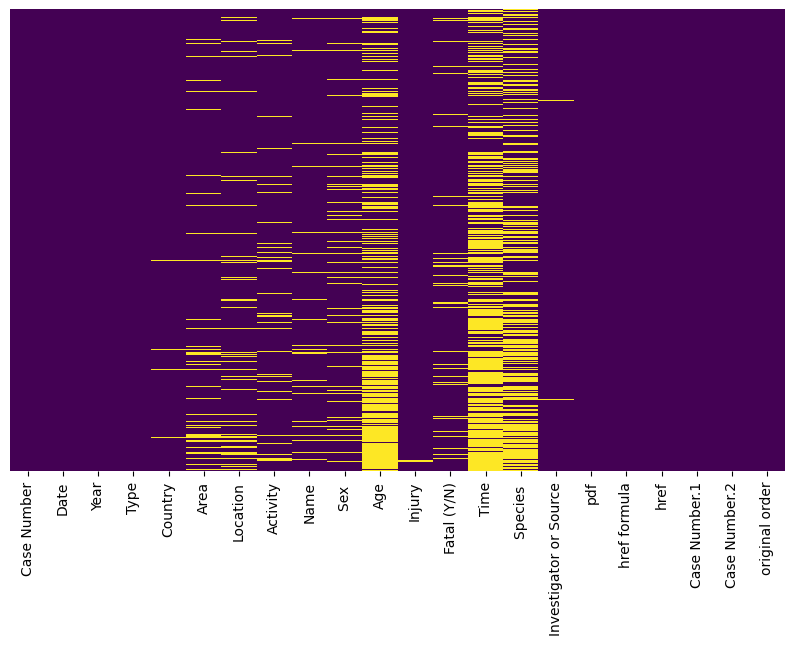

In [20]:
check_nan(sharks)

In [21]:
sharks[['Time', 'Age','Species ']]

,Time,Age,Species
0,18h00,57,White shark
1,14h00 -15h00,11,NaN
2,07h45,48,NaN
3,NaN,NaN,2 m shark
4,NaN,NaN,"Tiger shark, 3m"
...,...,...,...
6297,NaN,NaN,NaN
6298,NaN,NaN,NaN
6299,NaN,NaN,NaN
6300,NaN,NaN,NaN


In [22]:
sharks[sharks[['Time', 'Age', 'Species ']].isnull().all(axis=1)] # aquí vemos las filas en las que esas tres 
                                                                 # columnas tienen valores nulos

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0
17,2018.04.30.R,Reported 30-Apr-2018,2018.0,Unprovoked,THAILAND,Hua Hin,Sai Noi Beach,Swimming,female,M,NaN,Minor injury to ankle,N,NaN,NaN,"K. McMurray, TrackingSharks.com",2018.04.30.R-Thailand.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.30.R,2018.04.30.R,6286.0
90,2017.09.06.R,Reported 06-Sep-2017,2017.0,Unprovoked,SOLOMON ISLANDS,NaN,Owarigi Island,Spearfishing,Bartholmew,M,NaN,Foot bitten,N,NaN,NaN,BBC,2017.09.06-Bartholomew.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.06.R,2017.09.06.R,6213.0
94,2017.09.02.b,02-Sep-2017,2017.0,Unprovoked,USA,Texas,"South Padre Island, Cameron County",Swimming,female,F,NaN,Lacerations to foot,N,NaN,NaN,"Brownsville Herald, 9/5/2017",2017.09.02.b-SouthPadre.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.02.b,2017.09.02.b,6209.0
99,2017.08.26.a,26-Aug-2017,2017.0,Unprovoked,NEW ZEALAND,North Island,Off Tutukaka,Canoeing,Matt Kensington,M,NaN,"No injury, shark bit canoe",N,NaN,NaN,"C.Black, GSAF",2017.08.26.a-Kensington.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.08.26.a,2017.08.26.a,6204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,ND.0010,Circa 1862,0.0,Unprovoked,USA,Hawaii,Puna,NaN,"A ""chiefess""",F,NaN,Ankle bitten,N,NaN,NaN,Captain W. Young,ND-0010-Puna Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0010,ND.0010,11.0
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0


In [23]:
(sharks['Case Number.1'] == sharks['Case Number.2']).sum() # esto nos indica que no todos los valores de una y otra 
                                                           # son iguales, ya que en total hay 6302 columnas


6282

In [24]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [25]:
sharks['Species'] = sharks['Species '] # renombramos las dos columnas que suelen dar error por tener un espacio 
                                       # al final
sharks['Sex'] = sharks['Sex ']


In [26]:
nuevo_orden = ['Case Number','Case Number.1','Case Number.2', 'Date', 'Year','Time','Country', 'Area', 'Location', 'Type','Name', 'Sex', 'Age','Activity','Injury','Species', 'Fatal (Y/N)', 'Investigator or Source', 'pdf', 'href formula', 'href','original order']
                                         
sharks = sharks.reindex(columns=nuevo_orden)       # aquí reordeno las columnas para que tengan más sentido                                 

sharks                          
                    

,Case Number,Case Number.1,Case Number.2,Date,Year,Time,Country,Area,Location,Type,Name,Sex,Age,Activity,Injury,Species,Fatal (Y/N),Investigator or Source,pdf,href formula,href,original order
0,2018.06.25,2018.06.25,2018.06.25,25-Jun-2018,2018.0,18h00,USA,California,"Oceanside, San Diego County",Boating,Julie Wolfe,F,57,Paddling,"No injury to occupant, outrigger canoe and pad...",White shark,N,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,2018.06.18,2018.06.18,18-Jun-2018,2018.0,14h00 -15h00,USA,Georgia,"St. Simon Island, Glynn County",Unprovoked,Adyson McNeely,F,11,Standing,Minor injury to left thigh,NaN,N,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,2018.06.09,2018.06.09,09-Jun-2018,2018.0,07h45,USA,Hawaii,"Habush, Oahu",Invalid,John Denges,M,48,Surfing,Injury to left lower leg from surfboard skeg,NaN,N,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,2018.06.08,2018.06.08,08-Jun-2018,2018.0,NaN,AUSTRALIA,New South Wales,Arrawarra Headland,Unprovoked,male,M,NaN,Surfing,Minor injury to lower leg,2 m shark,N,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,2018.06.04,2018.06.04,04-Jun-2018,2018.0,NaN,MEXICO,Colima,La Ticla,Provoked,Gustavo Ramos,M,NaN,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,"Tiger shark, 3m",N,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,ND.0005,ND.0005,Before 1903,0.0,NaN,AUSTRALIA,Western Australia,Roebuck Bay,Unprovoked,male,M,NaN,Diving,FATAL,NaN,Y,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0
6298,ND.0004,ND.0004,ND.0004,Before 1903,0.0,NaN,AUSTRALIA,Western Australia,NaN,Unprovoked,Ahmun,M,NaN,Pearl diving,FATAL,NaN,Y,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0
6299,ND.0003,ND.0003,ND.0003,1900-1905,0.0,NaN,USA,North Carolina,Ocracoke Inlet,Unprovoked,Coast Guard personnel,M,NaN,Swimming,FATAL,NaN,Y,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0
6300,ND.0002,ND.0002,ND.0002,1883-1889,0.0,NaN,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",Unprovoked,Jules Patterson,M,NaN,NaN,FATAL,NaN,Y,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0


In [27]:
# vamos a transformar el tipo de dato en 'Year' y en 'original order' a entero


sharks['Year'].fillna(0.0, inplace = True)  # no nos deja sin antes convertir los NaN a 0 ya que en algunas filas el año es 0.0
sharks['Year'] = pd.to_numeric(sharks['Year'].astype('int'))

sharks['original order'] = pd.to_numeric(sharks['original order'].astype('int'))




In [28]:
sharks['Time'].unique()

array(['18h00', '14h00  -15h00', '07h45', nan, 'Late afternoon', '17h00',
       '14h00', 'Morning', '15h00', '08h15', '11h00', '10h30', '10h40',
       '16h50', '07h00', '09h30', 'Afternoon', '21h50', '09h40', '08h00',
       '17h35', '15h30', '07h30', '19h00, Dusk', 'Night', '16h00',
       '15h01', '12h00', '13h45', '23h30', '09h00', '14h30', '18h30',
       '12h30', '16h30', '18h45', '06h00', '10h00', '10h44', '13h19',
       'Midday', '13h30', '10h45', '11h20', '11h45', '19h30', '08h30',
       '15h45', 'Shortly before 12h00', '17h34', '17h10', '11h15',
       '08h50', '17h45', '13h00', '10h20', '13h20', '02h00', '09h50',
       '11h30', '17h30', '9h00', '10h43', 'After noon', '15h15', '15h40',
       '19h05', '1300', '14h30 / 15h30', '22h00', '16h20', '14h34',
       '15h25', '14h55', '17h46', 'Morning ', '15h49', '19h00',
       'Midnight', '09h30 / 10h00', '10h15', '18h15', '04h00', '14h50',
       '13h50', '19h20', '10h25', '10h45-11h15', '16h45', '15h52',
       '06h15', '14h

In [29]:
def horarios(hora):
    if pd.notna(hora):
        # Utilizamos una expresión regular para buscar un patrón al observar que muchas strings eran 'xxhyy'
        patron = re.search(r'(\d{1,2})h', hora)
        if patron:
            hora_numeros = int(patron.group(1))  # Extrae las horas, las convierte en int y devuelve el 1er valor
            if 5 <= hora_numeros < 12:
                return 'morning'
            elif 12 <= hora_numeros < 17:            # Establecemos unas etiquetas para categorizar los horarios
                return 'afternoon'
            elif 17 <= hora_numeros < 22:
                return 'evening'
            elif hora_numeros >= 22 or hora_numeros < 5:
                return 'night'
        # Si no encuentra un patrón de hora, que nos devuelva la cadena original
        return hora
    return hora  # Quiero que mantenga los valores NaN sin cambios para trabajar sobre ellos luego


sharks['Time'] = sharks['Time'].apply(horarios)



In [30]:
sharks['Time'] = sharks['Time'].str.lower()    # Transformamos todas las strings de 'Time' en minúsculas

sharks['Time'].unique()

array(['evening', 'afternoon', 'morning', nan, 'late afternoon', 'night',
       'midday', 'after noon', '1300', 'morning ', 'midnight',
       'early afternoon', '0830', 'just before noon', '1600',
       'early morning', 'dawn', 'am', 'a.m.', 'dusk', 'lunchtime',
       '15j45', '0500', 'sunset', '  ', '"evening"',
       'just before sundown', '--', ' ', 'shortly after midnight',
       '\xa0 ', 'late morning', 'p.m.', '8:04 pm',
       'possibly same incident as 2000.08.21', 'after dusk', 'noon',
       '2 hours after opperman', 'mid afternoon', 'mid morning',
       '"night"', '30 minutes after 1992.07.08.a', 'nightfall', 'x',
       '06j00', 'daybreak', 'mid-morning', 'just before dawn', 'daytime',
       'dark', '"after lunch"', 'late night', 'midday.', '"after dark"',
       '2 hrs before sunset', '1500', '"shortly before dusk"',
       'fatal  (wire netting installed at local beaches after this incident.)',
       'after midnight', 'late afternon', '"early evening"', '   ',
  

In [31]:
len(sharks['Time'].unique())

63

In [35]:
# Ahora vamos a eliminar los caracteres especiales no alfanuméricos y los espacios:

sharks['Time'] = sharks['Time'].str.replace(r'[^a-zA-Z0-9]', ' ', regex=True)
sharks['Time'].unique()

array(['evening', 'afternoon', 'morning', nan, 'late afternoon', 'night',
       'after noon', '1300', 'morning ', 'early afternoon', '0830',
       'just before noon', '1600', 'early morning', 'a m ', '15j45',
       '0500', '  ', ' evening ', 'just before sundown', ' ',
       'shortly after midnight', 'late morning', 'p m ', '8 04 pm',
       'possibly same incident as 2000 08 21', 'after dusk',
       '2 hours after opperman', 'mid afternoon', 'mid morning',
       ' night ', '30 minutes after 1992 07 08 a', 'x', '06j00',
       'just before dawn', 'daytime', ' after lunch ', 'late night',
       'midday ', ' after dark ', '2 hrs before sunset', '1500',
       ' shortly before dusk ',
       'fatal   wire netting installed at local beaches after this incident  ',
       'after midnight', 'late afternon', ' early evening ', '   ',
       'before daybreak'], dtype=object)

In [35]:
def reemplazar(time):
    if pd.notna(time) and time.isalpha():
        if 'noon' in time:
            return 'afternoon'
        elif 'night' in time:
            return 'night'
        elif 'morn' in time:
            return 'morning'
        elif 'dark' in time:
            return 'evening'
        elif 'midd' in time:
            return 'afternoon'
        elif 'down' in time:
            return 'evening'
        elif 'down' in time:
            return 'evening'
        elif 'dawn' in time:
            return 'evening'
        elif 'even' in time:
            return 'evening'
        elif 'am' in time:
            return 'morning'
        elif 'pm' in time:
            return 'evening'
        elif 'dusk' in time:
            return 'evening'
        elif 'break' in time:
            return 'morning'
        elif 'lunch' in time:
            return 'afternoon'
        elif 'sunset' in time:
            return 'evening'
        else:
            return time
    else:
        return time
  


In [34]:
sharks['Time'] = sharks['Time'].apply(reemplazar)
sharks['Time'].unique()

array(['evening', 'afternoon', 'morning', nan, 'late afternoon', 'night',
       'after noon', '1300', 'morning ', 'early afternoon', '0830',
       'just before noon', '1600', 'early morning', 'a m ', '15j45',
       '0500', '  ', ' evening ', 'just before sundown', ' ',
       'shortly after midnight', 'late morning', 'p m ', '8 04 pm',
       'possibly same incident as 2000 08 21', 'after dusk',
       '2 hours after opperman', 'mid afternoon', 'mid morning',
       ' night ', '30 minutes after 1992 07 08 a', '06j00',
       'just before dawn', ' after lunch ', 'late night', 'midday ',
       ' after dark ', '2 hrs before sunset', '1500',
       ' shortly before dusk ',
       'fatal   wire netting installed at local beaches after this incident  ',
       'after midnight', 'late afternon', ' early evening ', '   ',
       'before daybreak'], dtype=object)

In [39]:
sharks[:100]

,Case Number,Case Number.1,Case Number.2,Date,Year,Time,Country,Area,Location,Type,Name,Sex,Age,Activity,Injury,Species,Fatal (Y/N),Investigator or Source,pdf,href formula,href,original order
0,2018.06.25,2018.06.25,2018.06.25,25-Jun-2018,2018,evening,USA,California,"Oceanside, San Diego County",Boating,Julie Wolfe,F,57,Paddling,"No injury to occupant, outrigger canoe and pad...",White shark,N,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303
1,2018.06.18,2018.06.18,2018.06.18,18-Jun-2018,2018,afternoon,USA,Georgia,"St. Simon Island, Glynn County",Unprovoked,Adyson McNeely,F,11,Standing,Minor injury to left thigh,NaN,N,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302
2,2018.06.09,2018.06.09,2018.06.09,09-Jun-2018,2018,morning,USA,Hawaii,"Habush, Oahu",Invalid,John Denges,M,48,Surfing,Injury to left lower leg from surfboard skeg,NaN,N,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301
3,2018.06.08,2018.06.08,2018.06.08,08-Jun-2018,2018,NaN,AUSTRALIA,New South Wales,Arrawarra Headland,Unprovoked,male,M,NaN,Surfing,Minor injury to lower leg,2 m shark,N,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300
4,2018.06.04,2018.06.04,2018.06.04,04-Jun-2018,2018,NaN,MEXICO,Colima,La Ticla,Provoked,Gustavo Ramos,M,NaN,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,"Tiger shark, 3m",N,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017.09.02.a,2017.09.02.a,2017.09.02.a,02-Sep-2017,2017,morning,USA,Florida,"New Smyrna Beach, Volusia County",Unprovoked,Chase Elmore,M,17,Surfing,Minor injury to right hand,NaN,N,"Click Orlando, 9/2/2017",2017.09.02.a-Elmore.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6208
96,2017.08.29,2017.08.29,2017.08.29,29-Aug-2017,2017,morning,AUSTRALIA,Victoria,Cathedral Rock,Unprovoked,Marcel Brundler,M,37,Surfing,"No injury, board bitten","White shark, 3 m",N,"B. Myatt, GSAF",2017.08.27-Brundler.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6207
97,2017.08.27,2017.08.27,2017.08.27,27-Aug-2017,2017,afternoon,USA,Florida,Bathtub Beach,Unprovoked,Violet Veatch,F,3,Wading,Leg injured,NaN,N,"Sun Sentinel, 8/27/2017",2017.08.27-Veatch.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6206
98,2017.08.26.b,2017.08.26.b,2017.08.26.b,26-Aug-2017,2017,afternoon,SPAIN,Castellón,Grao de Moncofa,Invalid,female,F,11,Swimming,Lacerations to left foot,Shark involvement questionable,NaN,"El Periodico Mediterraneo, 8/27/2017",2017.08.26.b-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6205
